In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('car_evaluation.csv',header=None)

EDA


In [ ]:
df.shape

(1728, 7)

In [ ]:
df.head(2)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc


In [ ]:
col_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns=col_names

df.columns

df.head(2)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Frequency distribution of values in variables¶
we will check the frequency counts of categorical variables.

In [ ]:
for col in df.columns:
  print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [ ]:
df.head(2)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

#summary
.There are 7 variables in the dataset. All the variables are of categorical data type.
.These are given by buying, maint, doors, persons, lug_boot, safety and class.
.class is the target variable.


Categorical variables are mainly in the form of 'strings' or 'categories' and are finite in number. Two types of categorical data are ordinal and nominal.

Ordinal: The data that has an inherent order.

Nominal: The data that does not have an inherent order.

In [ ]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

The class target variable is ordinal in nature.

.Ordinal data is non-numeric data that is organized in a hierarchy. For example, if a feature contains the values "low, medium, high", it can be converted into {1,2,3}, where 1 represents low, 2 represents medium, and 3 represents high. Ordinal data is often used in machine learning (ML) because many ML algorithms do not support categorical data directly. Ordinal encoding is a preprocessing technique that converts categorical data into numeric values that preserve their order.

In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Declare feature vector and target variable

In [ ]:
X = df.drop(['class'], axis=1)

y = df['class']

Split data into separate training and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1209, 6), (1209,), (519, 6), (519,))

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [ ]:
#check types of variables
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [ ]:
!pip install category_encoders

In [ ]:
#I will encode the categorical variables.
#We can see that all the variables are ordinal categorical data type
# pip install --upgrade category_encoders
import category_encoders as ce

encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])

X_train=encoder.fit_transform(X_train)

X_test=encoder.transform(X_test)



In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


Decision Tree Classifier with criterion gini index

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini=clf_gini.predict(X_test)

Accuracy score:Accuracy classification score.

In multilabel classification, this function computes subset accuracy:
the set of labels predicted for a sample must *exactly* match the
corresponding set of labels in y_true.

In [ ]:
# check accuracy
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criterion gini index: 0.7592


Compare the train-set and test-set accuracy
to check for overfitting




In [ ]:
y_pred_train_gini=clf_gini.predict(X_train)

y_pred_train_gini

array(['acc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [ ]:
print('Trainin set accuracy score : {0:0.4f}'.format(accuracy_score(y_train,y_pred_train_gini)))


Trainin set accuracy score : 0.7767


Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set
# score : Return the mean accuracy on the given test data and labels.
print('Training set score: {:.4f}'.format(clf_gini.score(X_train,y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test,y_test)))

Training set score: 0.7767
Test set score: 0.7592


Here, the training-set accuracy score is 0.77  while the test-set accuracy to be 0.75 These two values are quite comparable. So, there is no sign of overfitting.



Visualize decision tree

[Text(0.625, 0.875, 'x[3] <= 2.5\ngini = 0.452\nsamples = 1209\nvalue = [266, 50, 852, 41]'),
 Text(0.5, 0.625, 'x[5] <= 1.5\ngini = 0.571\nsamples = 816\nvalue = [266, 50, 459, 41]'),
 Text(0.25, 0.375, 'x[0] <= 3.5\ngini = 0.627\nsamples = 273\nvalue = [147, 21, 64, 41]'),
 Text(0.125, 0.125, 'gini = 0.615\nsamples = 203\nvalue = [114, 21, 27, 41]'),
 Text(0.375, 0.125, 'gini = 0.498\nsamples = 70\nvalue = [33, 0, 37, 0]'),
 Text(0.75, 0.375, 'x[5] <= 2.5\ngini = 0.42\nsamples = 543\nvalue = [119, 29, 395, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 274\nvalue = [0, 0, 274, 0]'),
 Text(0.875, 0.125, 'gini = 0.59\nsamples = 269\nvalue = [119, 29, 121, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 393\nvalue = [0, 0, 393, 0]')]

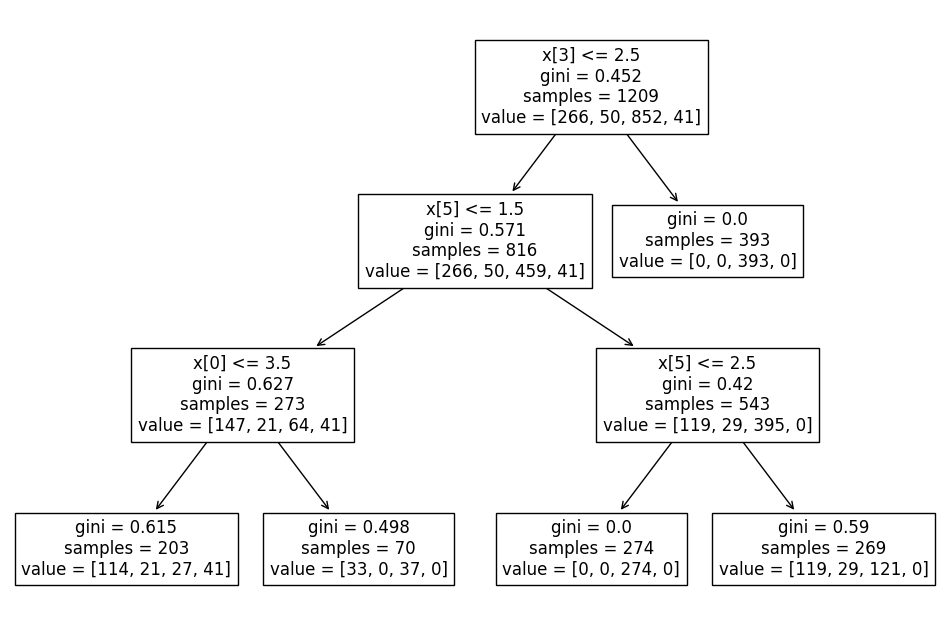

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train,y_train))

Visualize decision-trees with graphviz

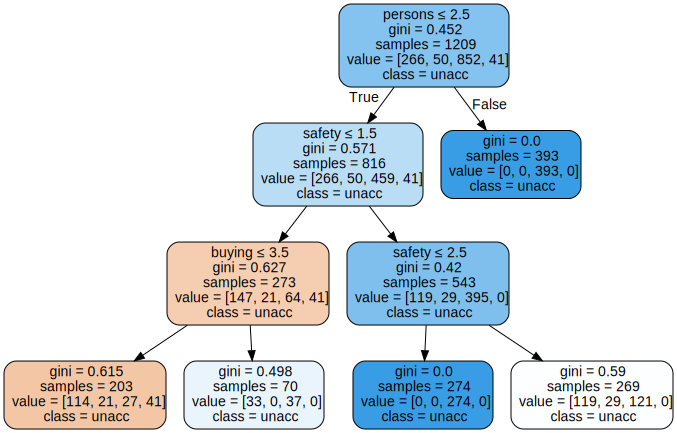

In [ ]:
import graphviz
dot_data=tree.export_graphviz(clf_gini,out_file=None,feature_names=X_train.columns,class_names=y_train,filled=True,rounded=True,special_characters=True)

graph=graphviz.Source(dot_data)

graph